<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [19]:
data_dir = pathlib.Path(data_dir) / 'flower_photos'
data_dir 

PosixPath('datasets/flower_photos/flower_photos')

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [21]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [23]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

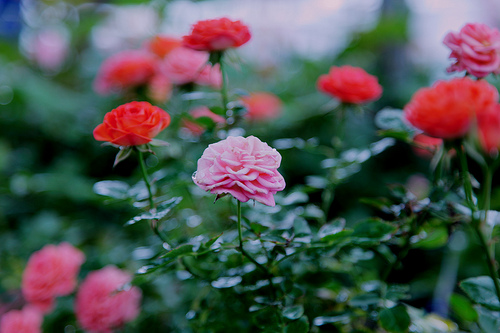

In [24]:
PIL.Image.open(str(roses[1]))

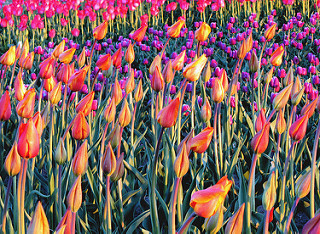

In [25]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [26]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [27]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [28]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [29]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'

In [30]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [31]:
img.shape

(243, 500, 3)

In [34]:
img

array([[[136, 125, 135],
        [ 88,  85,  94],
        [121, 124, 132],
        ...,
        [ 83,  80,  66],
        [ 70,  67,  53],
        [ 66,  60,  47]],

       [[100, 103, 111],
        [ 87,  97, 104],
        [122, 134, 140],
        ...,
        [ 62,  63,  47],
        [ 69,  66,  52],
        [ 78,  72,  59]],

       [[ 77,  66,  74],
        [ 82,  75,  82],
        [125, 122, 131],
        ...,
        [ 41,  50,  30],
        [ 65,  65,  49],
        [ 86,  78,  65]],

       ...,

       [[  0,   1,  41],
        [  0,   1,  35],
        [  0,   0,  28],
        ...,
        [  0,   1,  35],
        [  0,   2,  37],
        [  0,   2,  40]],

       [[  0,   2,  37],
        [  0,   1,  32],
        [  0,   0,  24],
        ...,
        [  0,   0,  34],
        [  0,   2,  37],
        [  1,   2,  40]],

       [[  0,   2,  36],
        [  0,   1,  29],
        [  0,   0,  19],
        ...,
        [  2,   0,  36],
        [  1,   0,  40],
        [  2,   1,  45]]

In [32]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

In [37]:
y

array([0, 0, 0, ..., 4, 4, 4])

<h3 style='color:purple'>Train test split</h3>

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [39]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [40]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.3398 - loss: 1.6156
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.5738 - loss: 1.0315
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6587 - loss: 0.8842
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.7384 - loss: 0.6785
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8336 - loss: 0.4899
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8981 - loss: 0.2861
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9550 - loss: 0.1676
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.9732 - loss: 0.0927
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9885 - loss: 0.0478
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.9840 - loss: 0.0469
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9928 - loss: 0.0281
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10

In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6616 - loss: 2.8104


[2.872288942337036, 0.6786492466926575]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [42]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[ -1.6927298 ,   9.609998  ,  -4.31649   ,  -6.325797  ,
        -12.656558  ],
       [ 15.856536  ,  -2.7146285 ,  -9.390911  ,  -7.235073  ,
          1.9744849 ],
       [-10.558293  , -11.124058  ,  19.235113  ,   0.81152046,
         -5.679245  ],
       ...,
       [-18.20433   ,  -4.9208946 ,   3.044067  ,  11.2295475 ,
         -4.560013  ],
       [  8.023939  ,  -1.9307824 ,  -5.4532623 ,  -7.331239  ,
          2.2231953 ],
       [-10.858333  , -23.103685  ,   2.110696  ,  29.035597  ,
         -3.042209  ]], dtype=float32)

In [43]:
score = tf.nn.softmax(predictions[0])

In [44]:
np.argmax(score)

1

In [45]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [49]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**Original Image**

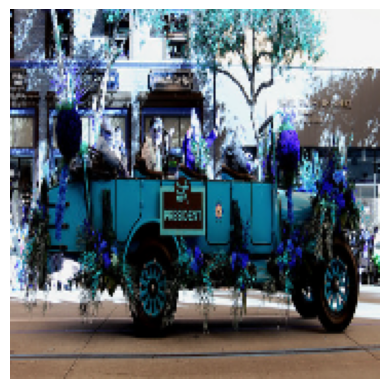

In [51]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

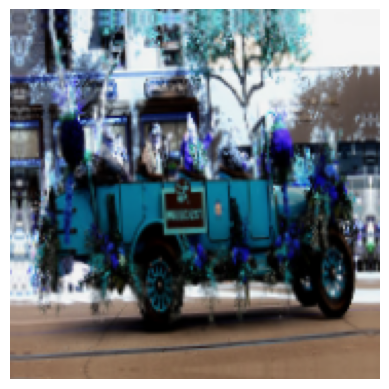

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.3379 - loss: 1.4806
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.5570 - loss: 1.0539
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.6496 - loss: 0.9078
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.6844 - loss: 0.8386
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.6970 - loss: 0.7845
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7023 - loss: 0.7674
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7080 - loss: 0.7667
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.7340 - loss: 0.6673
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.7579 - loss: 0.6047
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7631 - loss: 0.6253
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7909 - loss: 0.5650
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11

In [ ]:
model.evaluate(X_test_scaled,y_test)

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**